In [11]:
import pandas as pd
import numpy as np
import pydicom
import os
import sys
import glob

from pathlib import Path
from IPython.display import display
import matplotlib.pyplot as plt

In [12]:
# helper to transform rle to mask img
from mask_functions import rle2mask
from skimage.color import label2rgb

In [54]:
data_path = "D:/UT_Third_Year/UT_TY_Fall/APS360/Segmentation_data/archive"
data_path = Path(data_path)

In [55]:
train_rle = data_path / "train-rle.csv"

In [56]:
file = pd.read_csv(train_rle)

In [57]:
display(file.shape)
display(file.head())

(11582, 2)

,ImageId,EncodedPixels
0,1.2.276.0.7230010.3.1.4.8323329.5597.151787518...,-1
1,1.2.276.0.7230010.3.1.4.8323329.12515.15178752...,-1
2,1.2.276.0.7230010.3.1.4.8323329.4904.151787518...,175349 7 1013 12 1009 17 1005 19 1003 20 1002...
3,1.2.276.0.7230010.3.1.4.8323329.32579.15178751...,407576 2 1021 7 1015 10 1013 12 1011 14 1008 ...
4,1.2.276.0.7230010.3.1.4.8323329.32579.15178751...,252069 1 1021 3 1020 4 1018 5 1018 6 1016 7 1...


In [61]:
id = "1.2.276.0.7230010.3.1.4.8323329.300.1517875162.258081"
display(file.loc[file['ImageId'] == id])
#display(file.loc[0]['ImageId'])

,ImageId,EncodedPixels
2476,1.2.276.0.7230010.3.1.4.8323329.300.1517875162...,735441 12 1011 16 1007 18 1006 18 1006 18 100...


In [59]:
train_data_path = "D:/UT_Third_Year/UT_TY_Fall/APS360/Segmentation_data/archive/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.300.1517875162.258080/demo"
# train_data_path = "D:/UT_Third_Year/UT_TY_Fall/APS360/Segmentation_data/archive/dicom-images-train/demo_fig/demo"
train_data_path = Path(train_data_path)

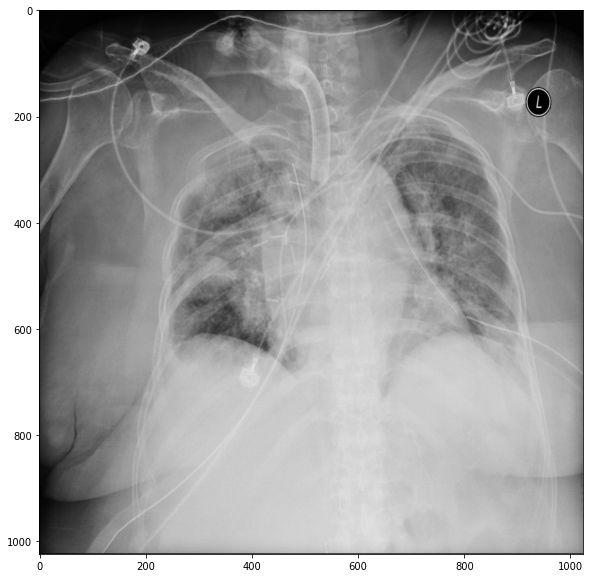

In [60]:
demo_img = train_data_path / "demo.dcm"
ds = pydicom.dcmread(demo_img)
plt.figure(figsize=(10, 10))
# plt.imshow(ds.pixel_array, cmap=plt.cm.bone)
plt.imshow(ds.pixel_array, cmap='gray')

In [39]:
path = Path(r"D:\UT_Third_Year\UT_TY_Fall\APS360\Segmentation_data\stage2")

In [41]:
path = path / "stage_2_train.csv"

In [43]:
stage2 = pd.read_csv(path)

In [44]:
display(stage2)

,Unnamed: 0,ImageId,EncodedPixels
0,420,1.2.276.0.7230010.3.1.4.8323329.3678.151787517...,194329 37 960 69 919 111 913 117 910 116 912 5...
1,9772,1.2.276.0.7230010.3.1.4.8323329.4200.151787518...,-1
2,1542,1.2.276.0.7230010.3.1.4.8323329.4862.151787518...,344265 2 1020 7 1015 9 1012 12 1010 14 1008 15...
3,7532,1.2.276.0.7230010.3.1.4.8323329.12313.15178752...,-1
4,5542,1.2.276.0.7230010.3.1.4.8323329.14214.15178752...,-1
...,...,...,...
12949,9837,1.2.276.0.7230010.3.1.4.8323329.3554.151787517...,-1
12950,4353,1.2.276.0.7230010.3.1.4.8323329.10366.15178752...,514175 10 1008 29 994 30 993 32 991 33 990 34 ...
12951,6020,1.2.276.0.7230010.3.1.4.8323329.1280.151787516...,-1
12952,1565,1.2.276.0.7230010.3.1.4.8323329.5454.151787518...,-1


In [45]:
display(stage2.loc[0]['ImageId'])

'1.2.276.0.7230010.3.1.4.8323329.3678.1517875178.953520'

# Display Sample Data

In [13]:
width = 1024
height = 1024
channle_num = 1
img_num = 3
project_dir = Path(sys.path[0])
sample_dir = project_dir / "sample_data"

In [14]:
train_rle = pd.read_csv(sample_dir / "train-rle.csv")

In [17]:
train_rle['label'] = train_rle.apply(lambda x: True if x[' EncodedPixels'] != ' -1' else False, axis=1)

In [18]:
display(train_rle)  # given data format (add to proposal)

,ImageId,EncodedPixels,label
0,1.2.276.0.7230010.3.1.4.8323329.5597.151787518...,-1,False
1,1.2.276.0.7230010.3.1.4.8323329.12515.15178752...,-1,False
2,1.2.276.0.7230010.3.1.4.8323329.4904.151787518...,175349 7 1013 12 1009 17 1005 19 1003 20 1002...,True
3,1.2.276.0.7230010.3.1.4.8323329.32579.15178751...,407576 2 1021 7 1015 10 1013 12 1011 14 1008 ...,True
4,1.2.276.0.7230010.3.1.4.8323329.32579.15178751...,252069 1 1021 3 1020 4 1018 5 1018 6 1016 7 1...,True
...,...,...,...
11577,1.2.276.0.7230010.3.1.4.8323329.4461.151787518...,592067 6 1016 10 1012 14 1007 18 1004 20 1003...,True
11578,1.2.276.0.7230010.3.1.4.8323329.4461.151787518...,610576 3 1001 38 981 53 966 63 956 73 947 87 ...,True
11579,1.2.276.0.7230010.3.1.4.8323329.32730.15178751...,-1,False
11580,1.2.276.0.7230010.3.1.4.8323329.13252.15178752...,-1,False


In [19]:
# data is a bit imbalance (add to proposal)
grouped = train_rle.groupby(by='label').count()
display(grouped)
print(f"{grouped.loc[True].values[0] / train_rle.shape[0]}% is diagonised pneumonia")
print(f"{grouped.loc[False].values[0] / train_rle.shape[0]}% isn't diagonised pneumonia")

,ImageId,EncodedPixels
label,,
False,8296,8296
True,3286,3286


0.28371611120704543% is diagonised pneumonia
0.7162838887929546% isn't diagonised pneumonia


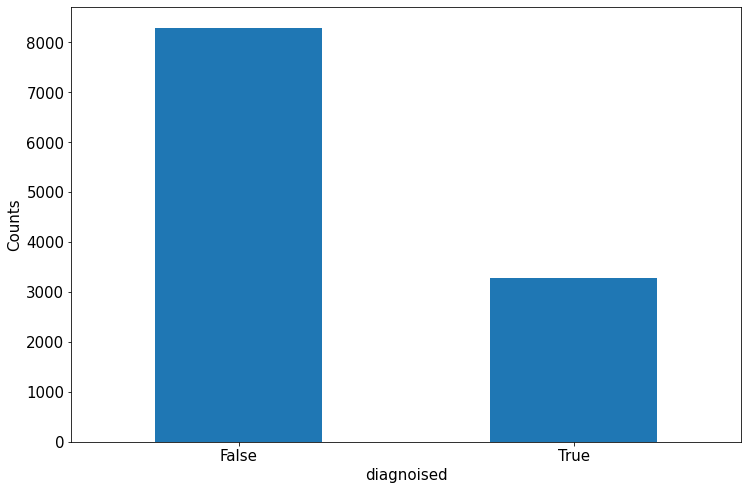

In [20]:
# redraw the picture with seaborn
ax = train_rle['label'].value_counts().plot(kind = 'bar',
    figsize = (12,8),fontsize=15,rot = 0)
ax.set_ylabel('Counts',fontsize = 15)
ax.set_xlabel('diagnoised',fontsize = 15)
plt.show()

In [21]:
img_list = glob.glob(f"{sample_dir}/*.dcm")

In [24]:
dcm_img = np.zeros((10, height, width, channle_num), dtype=np.uint8) # input image
masks = np.zeros((10, height, width, 1), dtype=bool) # Pneumothorax mask
img_id = []

for idx, path in enumerate(img_list):
    ds = pydicom.dcmread(path) # read dicom file
    dcm_img[idx] = np.expand_dims(ds.pixel_array, axis=2) # expand dimensions to fit array
    img_id.append(ds.file_meta[(2, 3)].value) # consider ds as a large dictionary['key']

In [25]:
# describe how we conver the data and visualize
for idx, id in enumerate(img_id):
    mask = train_rle.loc[train_rle['ImageId'] == id][' EncodedPixels'] # find the crossponding rle encoding
    mask = mask.values[0]
    if(mask != ' -1'):
        masks[idx] = np.expand_dims(rle2mask(mask, width, height).T, axis=2) # convert rle to Pneumothorax image
    else:
        masks[idx] = np.zeros((1024, 1024, 1)) # empty image


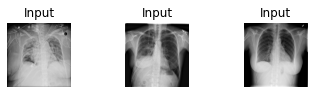

In [32]:
for i in range(img_num): #input data
    plt.subplot(3,3,i+1)
    plt.title("Input")
    # plt.figure(figsize=(5,5))
    plt.imshow(dcm_img[i], cmap='gray')
    plt.axis('off')



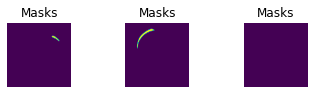

In [33]:
for i in range(img_num):
    plt.subplot(3,3,i+4)
    plt.title("Masks")
    # plt.figure(figsize=(5,5))
    plt.imshow(masks[i])
    plt.axis('off')

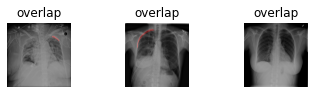

In [34]:
for i in range(img_num):
    plt.subplot(3,3,i+7)
    plt.title('overlap')
    # plt.figure(figsize=(5,5))
    plt.imshow(label2rgb(masks[i,:,:,0], image = dcm_img[i,:,:,0],alpha = 0.3))
    plt.axis('off') 
